# Principles of Data Science

### Lecture 21: Concepts for Machine Learning

_MPhil in Data Intensive Science_

**University of Cambridge**

<h2 style="color: blue">Matt Kenzie</h2>

[mk652@cam.ac.uk](mailto:mk652@cam.ac.uk)

## Advanced Topics

- What do I mean by these advanced topics?
    - <font color="green">*Some discussion in the lecture*</font>
    - Highly useful for applications (e.g. in your project)
    - They are **still** examinable

- Topics covered:
    - Some concepts for machine learning (today)
    - Density estimation
    - Expectation maximisation
    - Gaussian Mixture Models
    - Discrete nuisance parameters (*the envelope method*)
    - Projecting out p.d.f components (*sWeighting*)

## Concepts for machine learning

Today's lecture will heuristically cover some concepts in machine learning (of course related to some of the statistics we have learnt in this course)

By the end of this lecture, you should have an overall understanding of, and be comfortable discussing
- Measurement Error
- Forward modelling
- Optimisation
- Regularisation

## Measurement Error

- *Measurement error* (sometimes *observation error*) is the difference between the measured (observed) value and the true value
- In **our** language it is

$$ \hat{\theta} - \theta $$

- The estimate minus the truth

- This is **NOT** the bias (a common misconception)

$$ b(\hat{\theta}) = E[\hat{\theta} - \theta] $$


- Measurement errors are caused by statistical fluctuations
    - They are part and parcel of statistics and data analysis
    
- These are not normally problematic

- We have now built an armoury of statistical theory which incorporates these
    - This is what allows us to quote the estimated *error* on our estimates
    
- There are sometimes *also* systematic biases
    - These can cause problems if not accounted for
    
- **Machine learning applications** (mostly based on regression) are based on statistical theory which **incorporates measurement error**

## Forward modelling

- This is **what supervised machine learning algorithms do**
- They make some prediction based on input features
- We want them to minimise the difference between the prediction and some reference target
- Consider training sample of size $N$
$$ \vec{x}_i = \{\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N \} $$
- And target

$$ Y_i = \{ Y_1, Y_2, \dots, Y_N \} $$

- Want to build function (with some parameters) which makes some prediction (note small case $y$)

$$ y_i = f(\vec{x}_i, \vec{\theta}) $$

- <font color="red">*For typical regression problems, $\vec{\theta}$, are weights, $w_j$, and biases, $b_j$*</font>

- Algorithm training done by adjusting $\vec{\theta}$ to minimise different between $y_i$ and $Y_i$

$$ \chi^2 = \sum_i^N (y_i - Y_i)^2 = \sum_i^N \left( f(\vec{x}_i) - Y_i \right)^2 $$

- This is what is meant by **forward modelling**

- Need to ensure we avoid **over-training** using *statistically independent* adjoint samples (test / validation samples)

## Optimisation

- Given a function
$$ f(\vec{x}) $$
find the parameters $x_0$ which either *maximise* or *minimise* $f$

<br>

- Our typical examples have involved minimising / maximising a $\chi^2$ or a likelihood

#### How would you design a minimiser?


- 1D is rather trivial (scan points)
    - the brute force approach
    
- quickly gets out of hand for many-dimensions (scales with $n^m$)

- better to find the gradient (can be done analytically or numericall)

$$ \frac{\partial f}{\partial x} $$

- can also help to find the double gradient

$$ \frac{\partial^2 f}{\partial x^2} $$

- In the case of a **negative log-likelihood minimisation** the double gradient is also useful to compute

$$ V(\hat{\theta}) \approx \left. \frac{\partial^2 \ln L}{\partial \theta^2} \right|_{\theta=\hat{\theta}}^{-1} $$

# <font color="darkred">*Musical interlude...*</font>

## Optimisation alogrithms

- `scipy.optimize` contains several which are useful

In [3]:
import numpy as np
import matplotlib.pyplot as plt

- `scipy.optimize.minimize` has several `methods`
- read the `scipy` docs to get an overview
- requires an initial guess
- can optionally pass bounds

In [14]:
import scipy.optimize as opt

def f(x):
    return x**2 - 2*x + 1

res = opt.minimize(f, x0=5)

print(res)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0
        x: [ 1.000e+00]
      nit: 3
      jac: [ 0.000e+00]
 hess_inv: [[ 5.000e-01]]
     nfev: 8
     njev: 4


- note this does give some information on the uncertainty
- as it returns the Hessian matrix (matrix of double differentials)

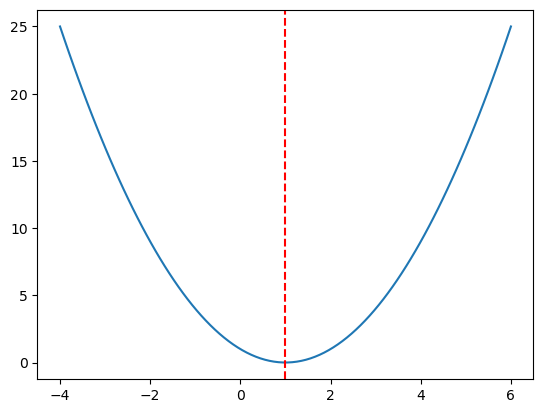

In [16]:
x = np.linspace(-4,6,100)
plt.plot(x, f(x))
plt.axvline( res.x[0], c='r', ls='--')

- `scipy.optimize.basinhopping` and `scipy.optimize.brute`
- useful for cases with multiple minima

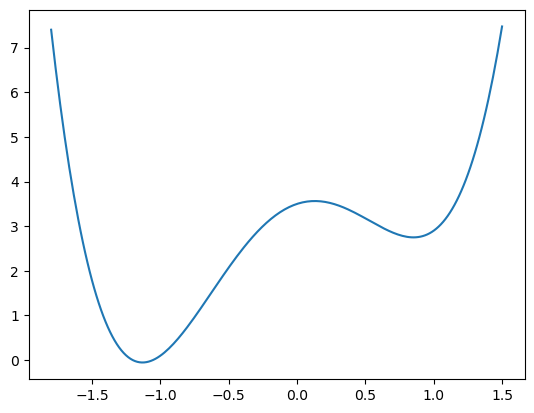

In [23]:
def func(x):
    return 2*x**4 + 0.4*x**3 - 4*x**2 + x + 3.5

xrange = (-1.8, 1.5)
x = np.linspace(*xrange, 200)
plt.plot(x, func(x))

In [25]:
res1 = opt.minimize(func, x0=1)
print(res1)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.7496449642158223
        x: [ 8.518e-01]
      nit: 5
      jac: [-1.788e-07]
 hess_inv: [[ 8.719e-02]]
     nfev: 14
     njev: 7


In [28]:
res2 = opt.basinhopping(func, x0=1)
print(res2)

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: 2.7496449642158196
                          x: [ 8.518e-01]
                        nit: 100
      minimization_failures: 0
                       nfev: 1566
                       njev: 783
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: 2.7496449642158196
                                    x: [ 8.518e-01]
                                  nit: 5
                                  jac: [ 8.941e-08]
                             hess_inv: [[ 8.734e-02]]
                                 nfev: 14
                                 njev: 7


In [30]:
res3 = opt.brute(func, ranges=[xrange])
print(res3)

[-1.1314376]


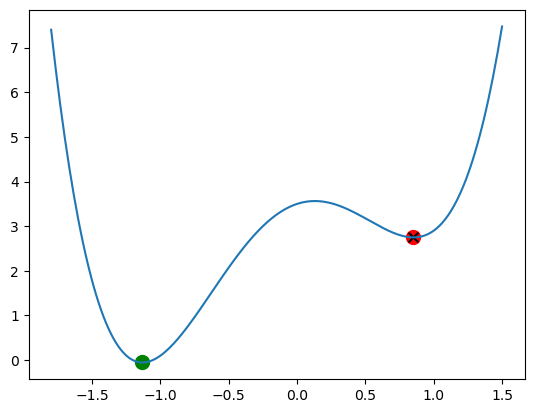

In [42]:
plt.plot(x, func(x))
plt.scatter( res1.x[0], func(res1.x[0]), c='r', s=100)
plt.scatter( res2.x[0], func(res2.x[0]), c='k', marker='x', s=50)
plt.scatter( res3[0], func(res3[0]), c='g', s=100)

- the `migrad` algorithm
- you have seen me make **extensive** use of this
- it is the minimise that `iminuit` uses
- it is **ancient** (by modern standards) but insurpassable (IMO) for statistical fits

## Gradient descent

- Used extensively in machine learning (often via the "Adam" optimiser)
- Numerical calculation of gradient to "descend" in *cost function*
- Has a free parameter, the <font color="blue">*learning rate*</font> (sometimes called `alpha`)

<img src="plots/grad_descent1.png" alt="drawing">

- Beware of local minima and saddle points
- Most optimisation algorithms are not designed for these
- Beware also of **vanishing gradients** and **exploding gradients**
- Training gets stuck over epochs

<img src="plots/grad_descent2.png" alt="drawing">

## Parameters in optimisations

<font color="green">*Discussion in the lecture*</font> <br>
<br>
Think **very** carefully about:

- parameter definitions
    - optimisers are designed for and generally like parameters to be $\mathcal{O}(1)$
- parameter starting values
    - most optimisers **require** a starting value
- parameter starting errors
    - some optimiser **optionally provide** a starting uncertainty
    - `migrad` is one of these which will initially guess 10% of the starting value
    - this helps to tell the minimiser "**how far away**" it should be looking (more accurate gradients)
    
- parameter limits
    - most optimisers **support** parameter limits
    - helps to tell the minimiser the boundaries of where it should be looking

<img src='plots/starting_vals.png'>

## Regularisation

- *Regularisation* refers to specific terms added to the cost function in order to **steer** or change the optimisation outcome
- Examples include
    - Priors
    - Constraints
    - Terms to avoid over-fitting 
    - Early-stopping
    - Hyperparameters
- Without regularisation many ML algorithms will *perfectly* learn their training sample
    - We want them to **establish trends** not learn **statistical fluctuations**

- *Regularisation* achieved by
$$ L = \sum_i^N V\left( f(x_i), Y_i) \right) + \lambda R(f) $$

- With $R$ the <font color="red">*regularisation term</font>
    - typically depends on the complexity of $f$ (number of $w_j$ and $b_j$) and the sample size, $N$
<br><br>
- The parameter $\lambda$ is an additional hyperparameter
    - can be tuned or trained on an independent sample
    
<img src="plots/regularisation.png" width="800">

## Examples of regularisation we have already seen

- The extended maximum likelihood
- Constraint terms in likelihoods 
- Systematic terms

# End of Lecture 21

By the end of this lecture you should have an overall understanding of, and be comfortable discussing
- Measurement Error
- Forward modelling
- Optimisation
- Regularisation